<a href="https://colab.research.google.com/github/rudevico/Gachon-AISTUDY/blob/main/DL_regression_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Introduction
**Purpose:**  
* Deep Learning algorithm으로 diabetes dataset에 대한 regression, 이때 label = 'BMI'

**Framework**  
* PyTorch: Version `2.3.1+cu121`

**Dependencies**  
* Python: Version `3.10.12`
* Numpy: Version `1.25.2`
* Pandas: Version `2.0.3`
* scikit-learn: Version `1.3.2`
    

# 1. DL

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [16]:
# load the dataset
url = 'https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv'
df = pd.read_csv(url)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
# features, label 확인
print(df.shape)
print(df.columns)

(768, 9)
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [17]:
# regression을 위한 dataset 수정
# 'Outcome'은 삭제하고, 'BMI'는 마지막 index로 바꾸기(Label로 사용)
temp_BMI = df['BMI']
df = df.drop(['BMI', 'Outcome'], axis=1)
print(df.shape) # 현재의 마지막 index 범위 확인 0 ~ 6

(768, 7)


[pandas.DataFrame.insert](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.insert.html#pandas.DataFrame.insert)
```
DataFrame.insert(loc, column, value, allow_duplicates=_NoDefault.no_default
```

**source:**  
* Insert column into DataFrame at specified location.

* Raises a ValueError if column is already contained in the DataFrame, unless allow_duplicates is set to True.

**Parameters:**  
* __loc__: int
    - Insertion index. Must verify 0 <= loc <= len(columns).

* __column__: str, number, or hashable object
    - Label of the inserted column.

* __value__: Scalar, Series, or array-like
    - Content of the inserted column.

* __allow_duplicates__: bool, optional, default lib.no_default
    - Allow duplicate column labels to be created.

In [18]:
# column index 7 에 temp_BMI를 'BMI'라는 column name으로 insert
df.insert(7, 'BMI', temp_BMI)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,Age,BMI
0,6,148,72,35,0,0.627,50,33.6
1,1,85,66,29,0,0.351,31,26.6
2,8,183,64,0,0,0.672,32,23.3
3,1,89,66,23,94,0.167,21,28.1
4,0,137,40,35,168,2.288,33,43.1


In [19]:
# .info()는 Non-Null Count를 리턴
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   BMI                       768 non-null    float64
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


In [22]:
# .isnull().sum()은 Null Count를 리턴
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
DiabetesPedigreeFunction    0
Age                         0
BMI                         0
dtype: int64

[pandas.DataFrame.dropna](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html#pandas-dataframe-dropna)
```
DataFrame.dropna(*, axis=0, how='any', thresh, subset, inplace, ignore_index=False)
```
**source:**  
* Remove missing values.

**Parameters:**  
* __axis:__ {0, 1}, default 0  
&emsp;&emsp;Determine if rows or columns which contain missing values are removed.  
    - 0: Drop rows which contain missing values.
    - 1: Drop columns which contain missing value.  

&emsp;&emsp;&emsp;Only a single axis is allowed.  

* __how:__ {'any', 'all'}, default 'any'  
&emsp;&emsp;Determine if row or column is removed from DataFrame, when we have at least one NA or all NA.  
    - 'any': If any NA values are present, drop that row or column.
    - 'all': If all values are NA, drop that row or column.

* __thresh:__ int, optional  
&emsp;&emsp;Require that many non_NA values. Cannot be combined with how.  
> missing value가 n개 이상일 때만 drop

* __subset:__ column label or sequence of labels, optional  
&emsp;&emsp;Labels along other axis to consider, e.g. if you are dropping rows these would be a list of columns to include.  
> 지정된 column(s)에 대해서만 수행

* __inplace:__ bool, default False  
&emsp;&emsp;Whether to modify the DataFrame rather than creating a new ine.

* __ignore_index:__ bool, default False  
&emsp;&emsp;If True, the resulting axis will be labeled 0, 1, ..., n-1.  
> `.dropna()`에 의해서 특정 row가 사라졌을 때 남은 index들에 대해서 다시 0부터 index를 지정한다.

In [50]:
# cf. ignore_index
a = pd.DataFrame([[1, None], [3, 4], [5, 6]], columns=['A', 'B'])
a

,A,B
0,1,NaN
1,3,4.0
2,5,6.0


In [51]:
# cf. ignore_index
# rows index가 그대로 유지됨
a = a.dropna(axis=0, ignore_index=False)
a

,A,B
1,3,4.0
2,5,6.0


In [52]:
# cf. ignore_index
# rows index가 다시 0부터 할당
a = a.dropna(axis=0, ignore_index=True)
a

,A,B
0,3,4.0
1,5,6.0


In [ ]:
# if missing value is exits, drop it
# df = df.dropna()

In [20]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,Age,BMI
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,0.471876,33.240885,31.992578
std,3.369578,31.972618,19.355807,15.952218,115.244002,0.331329,11.760232,7.884160
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,0.243750,24.000000,27.300000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,0.372500,29.000000,32.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,0.626250,41.000000,36.600000
max,17.000000,199.000000,122.000000,99.000000,846.000000,2.420000,81.000000,67.100000


In [ ]:
'''
| Pregnancies               | 임신 횟수
| Glucose                   | 글루코스
| BloodPressure             | 혈압
| SkinThickness             | 삼두근 부위 피부 두께
| Insulin                   | 인슐린 수치
| DiabetesPedigreeFunction  | 당뇨 유전병 인자 함수
| Age                       | 나이
| BMI                       | BMI 수치(Label)
'''

[pandas.DataFrame.corr](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html)

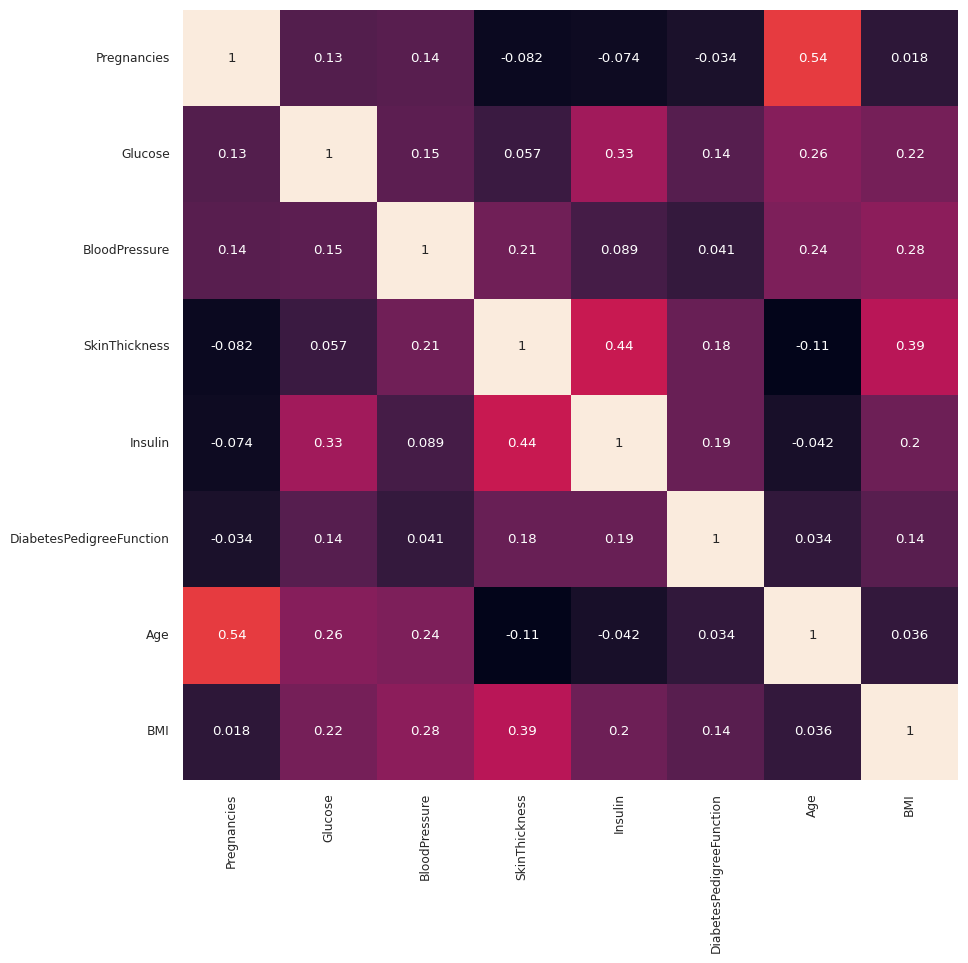

In [55]:
# correlation of features and label

# if corr >= 0.3, correlated and if corr >= 0.7, high correlated
df_corr = df.corr()

plt.figure(figsize=(10, 10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

# the label(BMI) is correlated with SkinThickness(0.39)